<a href="https://colab.research.google.com/github/Deepayanbasu07/ML-for-Band-Gap-Prediction/blob/main/BG_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,318,319,320,321,322,323,324,325,326,band_gap
0,25.2,89,8,31.958723,11.490283,90.000000,90.0,90.0,0.2,2.040034,...,0,0,0,0,0,0,0,0,0,4.1024
1,23.6,89,5,32.720636,10.309625,90.000000,90.0,90.0,0.2,1.967621,...,0,0,0,0,0,0,0,0,0,0.8071
2,27.4,89,8,31.417193,12.272569,90.000000,90.0,90.0,0.4,2.085318,...,0,0,0,0,0,0,0,0,0,2.0031
3,28.4,89,8,31.372600,11.985877,90.000000,90.0,90.0,0.4,2.068944,...,0,0,0,0,0,0,0,0,0,0.0000
4,27.8,89,8,31.384072,12.359462,90.000092,90.0,90.0,0.4,2.090224,...,0,0,0,0,0,0,0,0,0,0.9888


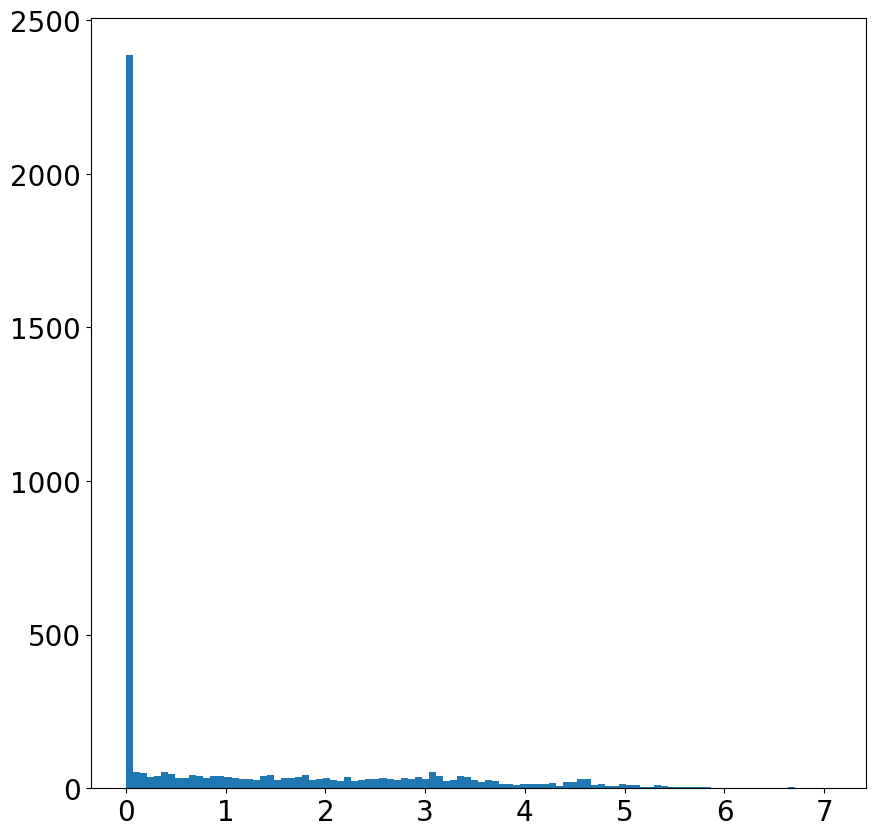

In [3]:
plt.rcParams.update({'font.size': 20})

plt.figure(figsize=(10, 10))
plt.hist(df['band_gap'], bins=100)
plt.savefig('Histogram_PDF', bbox_inches='tight')

This plot shows that amost half of our structures are metals (zero bandgap). The bandgaps around 7 eV could be outliers, but we can deal with those in a later.

How about a scatter plot?

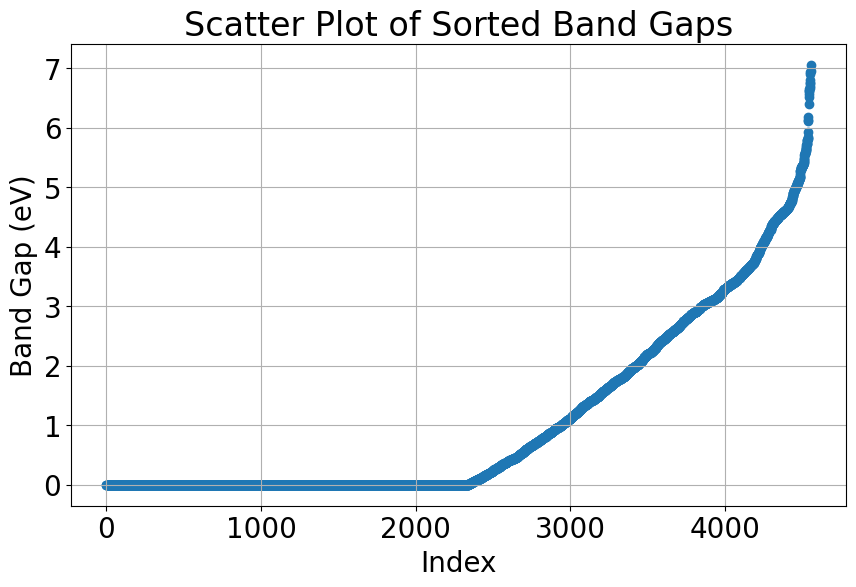

In [4]:
# Sort the DataFrame by band gap values
df_sorted = df.sort_values('band_gap')

# Extract the sorted band gap values
sorted_bandgaps = df_sorted['band_gap'].values

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(sorted_bandgaps)), sorted_bandgaps)
plt.xlabel('Index')
plt.ylabel('Band Gap (eV)')
plt.title('Scatter Plot of Sorted Band Gaps')
plt.grid(True)
plt.show()


### Train-Test Split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df, df["band_gap"], test_size=.2, random_state=None)

Then we normalize our dataset using the normalization applied on the training set.

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# We need to normalize the data using a scaler

# Define the scaler
scaler = StandardScaler().fit(X_train)

# Scale the training and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Next, we create a pandas DataFrame object

In [9]:
# X_train.to_csv('train_set.csv')
# X_test.to_csv('test_set.csv')

# from google.colab import files
# files.download('train_set.csv')
# files.download('test_set.csv')


### The machine learning task

Now it's time to actually do machine learning. We will try two machine learning models: the random forests and the XGBOOST models. We will quantify the prediction accuracy using two measures: goodness of fit (R2) and the mean squared error (MSE).

RF MAE	0.0022922195389678945

RF R2	0.9999100159046438

XGBOOST MAE	0.007091375303173743

XGBOOST R2	0.9998081513297306



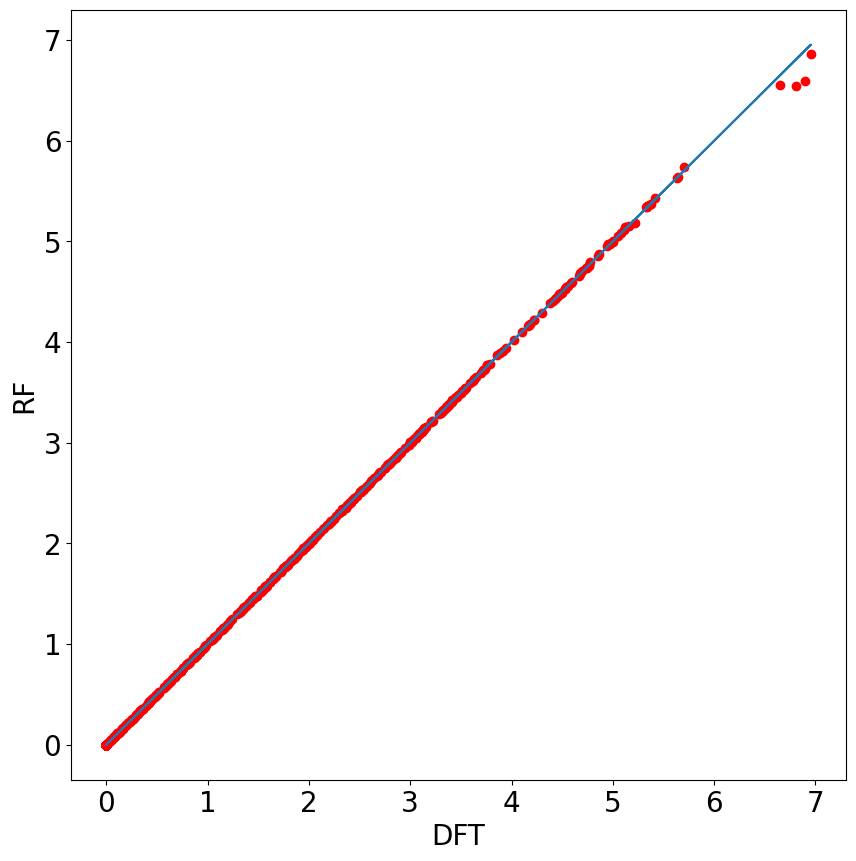

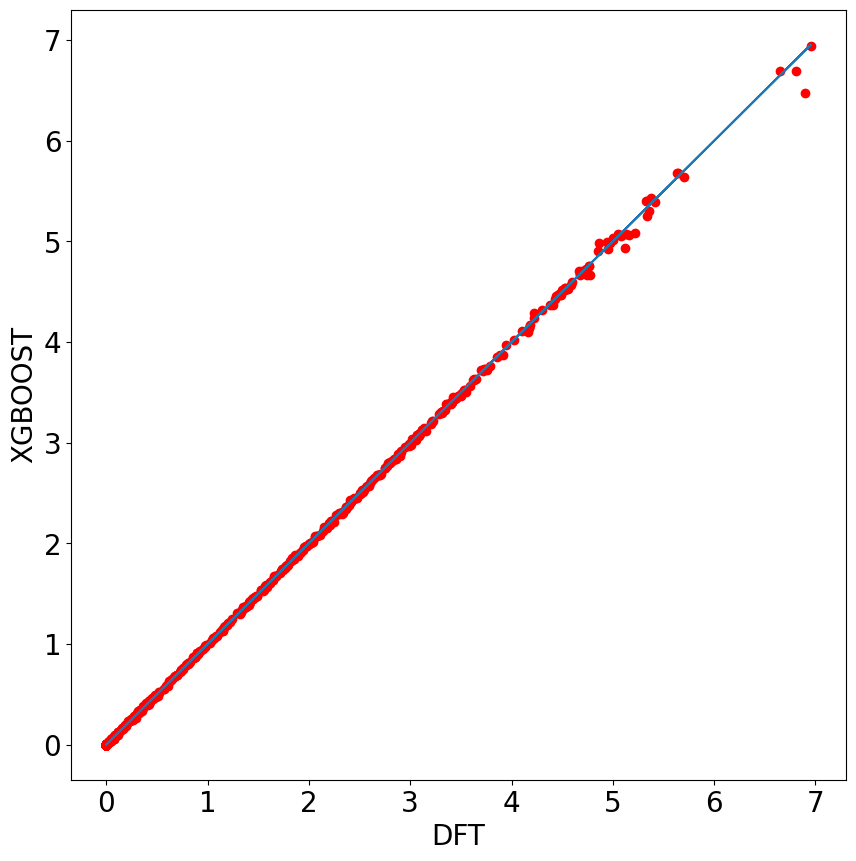

In [7]:
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=400, max_depth=400, random_state=0)
regr.fit(X_train_scaled, y_train)
y_predicted = regr.predict(X_test_scaled)

print('RF MAE\t'+str(mean_absolute_error(y_test, y_predicted))+'\n')
print('RF R2\t'+str(r2_score(y_test, y_predicted))+'\n')

xPlot=y_test
yPlot=y_predicted
plt.figure(figsize=(10,10))
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('RF')
plt.xlabel('DFT')
plt.savefig('RF_Correlation_Test', bbox_inches='tight')


regr = XGBRegressor(objective='reg:squarederror', max_depth=10, n_estimators=400)
regr.fit(X_train_scaled, y_train)
y_predicted = regr.predict(X_test_scaled)

print('XGBOOST MAE\t'+str(mean_absolute_error(y_test, y_predicted))+'\n')
print('XGBOOST R2\t'+str(r2_score(y_test, y_predicted))+'\n')


xPlot=y_test
yPlot=y_predicted
plt.figure(figsize=(10,10))
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('XGBOOST')
plt.xlabel('DFT')
plt.savefig('XGBOOST_Correlation_Test', bbox_inches='tight')



Linear Regression MAE:	9.247885212275937e-07
Linear Regression R2:	0.9999999999278716

Decision Tree MAE:	0.003075192096597141
Decision Tree R2:	0.9999731067065273

K-Nearest Neighbors MAE:	0.5752417343578485
K-Nearest Neighbors R2:	0.6394996812027871

Support Vector Machine MAE:	0.20679495986601412
Support Vector Machine R2:	0.9275234011990483

Neural Network MAE:	0.12199580165706497
Neural Network R2:	0.980919155321298

Random Forest MAE:	0.0022922195389678945
Random Forest R2:	0.9999100159046438

XGBoost MAE:	0.007091375303173743
XGBoost R2:	0.9998081513297306



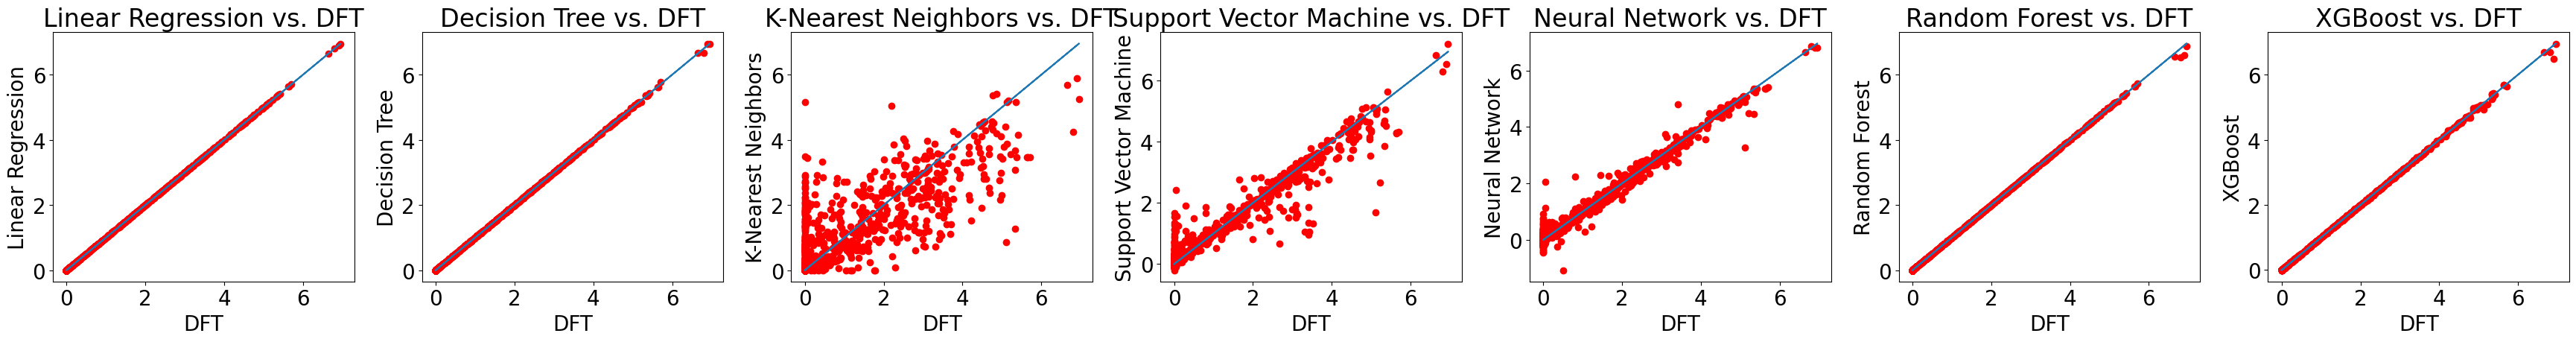

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# ... (Your existing code)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Support Vector Machine": SVR(),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000),
    "Random Forest": RandomForestRegressor(n_estimators=400, max_depth=400, random_state=0),
    "XGBoost": XGBRegressor(objective='reg:squarederror', max_depth=10, n_estimators=400)
}

# Number of models
n_models = len(models)

# Create subplots
fig, axes = plt.subplots(1, n_models, figsize=(5 * n_models, 5))  # Adjust figsize as needed

# Evaluate and plot models
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_predicted = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    print(f"{name} MAE:\t{mae}")
    print(f"{name} R2:\t{r2}\n")

    # Plot on the corresponding subplot
    axes[i].plot(y_test, y_predicted, 'ro')
    axes[i].plot(y_test, y_test)
    axes[i].set_ylabel(name)
    axes[i].set_xlabel('DFT')
    axes[i].set_title(f"{name} vs. DFT")

# Adjust layout and display plots
plt.tight_layout()
plt.show()


### Conclusion


In this project, we explored the application of machine learning models, specifically Random Forest and XGBoost, to predict band gaps of materials.
1. The dataset was preprocessed, including a train-test split and feature scaling.
2. Both models were trained and evaluated using mean absolute error (MAE) and R-squared (R2) metrics.

3. Based on the results, XGBoost slightly outperformed Random Forest in terms of both MAE and R2 scores. But from the plots, Linear regression is the best obvious choice.
4. The correlation plots visually demonstrate the agreement between predicted and actual band gaps for both models.

5. Further improvements could involve hyperparameter tuning, feature engineering, or exploring alternative model architectures to enhance prediction accuracy.
